In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
from sys import platform
import f90nml

import retrievestuff 
#import importlib; importlib.reload(retrievestuff)

<module 'retrievestuff' from '/Users/nesh/Documents/Repositories/IceContinuum with Maggie/retrievestuff.py'>

In [9]:
%matplotlib notebook

In [10]:
# Have to do this in case of different operating systems
if platform == "linux" or platform == "darwin":
    slash = '/'
else: # This is assumed to be Windows
    slash = '\\'
#print(slash)

In [11]:
# This is the folder name
foldername = "Fri Mar  1 14_36_55 2019"
#foldername = "Case2.1"

# Load a height file (for synthetic data)
filename = "surface.txt"
#filename = "surface_filtered.txt"
sollast = np.loadtxt(foldername+slash+filename)
Ny, Nx = np.shape(sollast); #print(sollast.shape)
print("Nx =", Nx)
print("Ny =", Ny)

# Get other parameters
params = f90nml.read(foldername+slash+'parameters.nml')
Lx = params['parameters']['Lx']; print("Lx =", Lx)
Ly = params['parameters']['Ly']; print("Ly =", Ly)

Nx = 151
Ny = 150
Lx = 30
Ly = 31


In [12]:
# Get the x and y axes as arrays and grids
x = np.linspace(0,Lx,Nx); #print(x[1]-x[0])
y = np.linspace(0,Ly,Ny); 
xgrid,ygrid = np.meshgrid(x,y); #print(xgrid.shape)
dx = x[1]-x[0]
dy = y[1]-y[0]

<IPython.core.display.Javascript object>


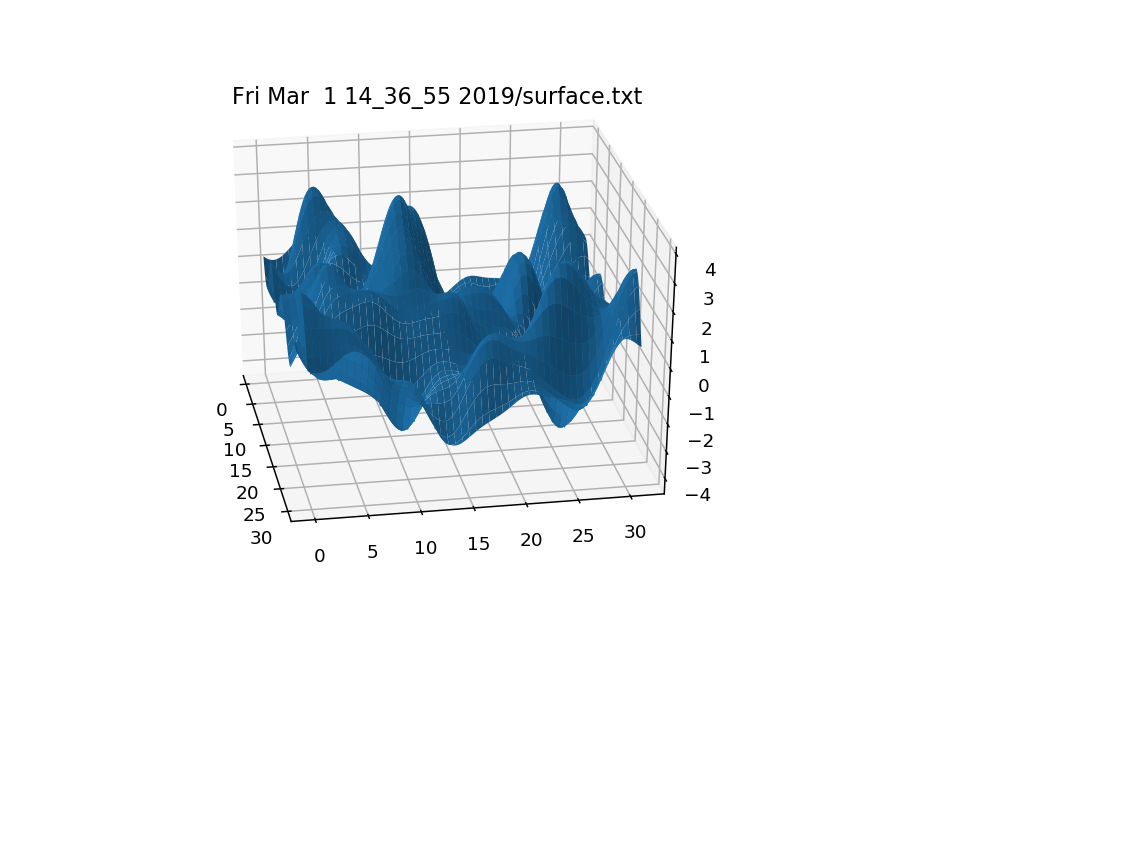

In [13]:
# Plot the surface as a mesh
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.plot_surface(xgrid, ygrid, sollast)
ax.set_title(foldername+slash+filename)
ax.view_init(30, -10)

[0.50876957 0.25257271 0.12572707 0.05668904 0.02724832 0.01668904
 0.00899329 0.00331096]


<IPython.core.display.Javascript object>


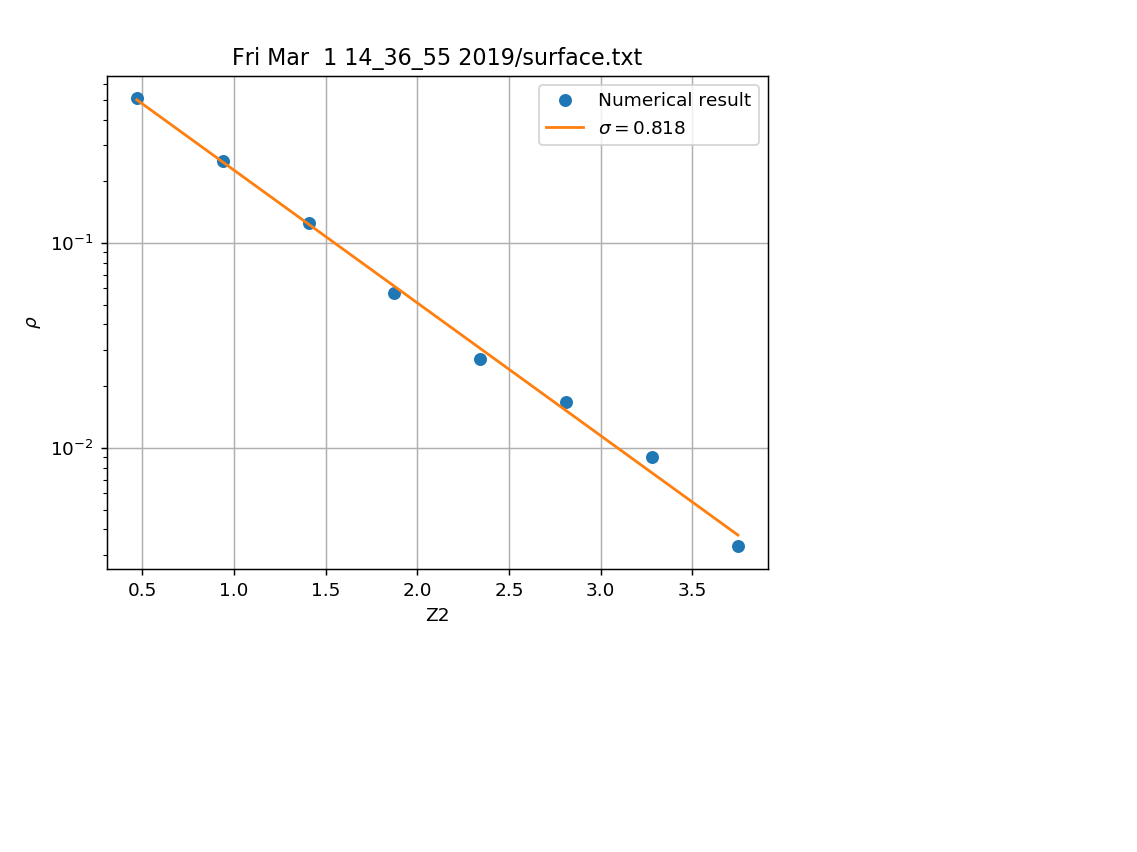

In [16]:
# Get the probability distribution in Z2
nbins = 9
counts, bins = retrievestuff.getrhoofz2(sollast,dx,dy,nbins=8,transposeflag=False)
print(counts)

# Graphing it
fig = plt.figure()
plt.semilogy(bins, counts, 'o', label='Numerical result')
plt.grid(True)
plt.xlabel('Z2')
plt.ylabel(r'$\rho$')
plt.title(foldername+slash+filename)

# Line fitting
subset = np.array([i for i in range(0,len(bins))])
newbins = bins
logcounts = np.log(counts[subset])
p = np.polyfit(newbins[subset], logcounts, 1)
sigma = 1/(-p[0])**.5
sigma = int(sigma*1000)/1000
plt.semilogy(bins, np.exp(np.polyval(p,bins)), label=r'$\sigma = $'+str(sigma))

# Add a legend
plt.legend()